In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.options.display.max_columns = 100

from splitting import Splitting
from analysis import AnalysisMetrics
from hyperparams import Hyperparameters
from transforms import ClusterTransform
from modeling import Model 

print(pd.__version__)


0.24.2


In [4]:
features = [
    u'original_pid',
    u'account_id',
    u'original_product_dimension_25',
    u'original_product_dimension_26',
    u'week_agg_8',
    u'baseline_units',
    u'consumer_length',
    u'promotion_type',
    u'discount_perc_cohort',
    u'promoted_niv',
    u'previous_promotion_week_distance',
    u'total_nr_products'
]

# Model no clusters

In [5]:
model = Model(model_name='model_no_clusters')

params = {0.0: {'colsample_bytree': 0.5,
  'gamma': 0.75,
  'learning_rate': 0.04,
  'max_depth': 5,
  'min_child_weight': 5.0,
  'n_estimators': 142,
  'reg_alpha': 0.9,
  'reg_lambda': 1.4500000000000002,
  'subsample': 0.55,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0}}

model.create(
    params=params,
    max_evals=200,
    target_ratio_val=None,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    features=features,
    target='total_units',
    cat_feature=None,
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    account_filter=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'],
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2',
    duplication_map=None)

model.train()

Future data filtering...
- status of promotion: 153
- products not exist in train dataset: 20564
- excluded flag: 0
- zero planned baseline: 15697
- zero planned in-store total volume: 703
- planned in-store total volume lower then baseline: 875
Model for 0.0 trained
The model is trained


No handlers could be found for logger "vf_portalytics.ml_helpers"


In [6]:
analysis_metrics = AnalysisMetrics(
    model=model,
    reevaluate=True,
    number_tests=100,
    use_product_filter=True,
    filter_threshold=300,
    account_test_filter=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group']
)

Data filter initializing...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of 100
Future data filter initializing...
Evaluating the Model for historic data...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100

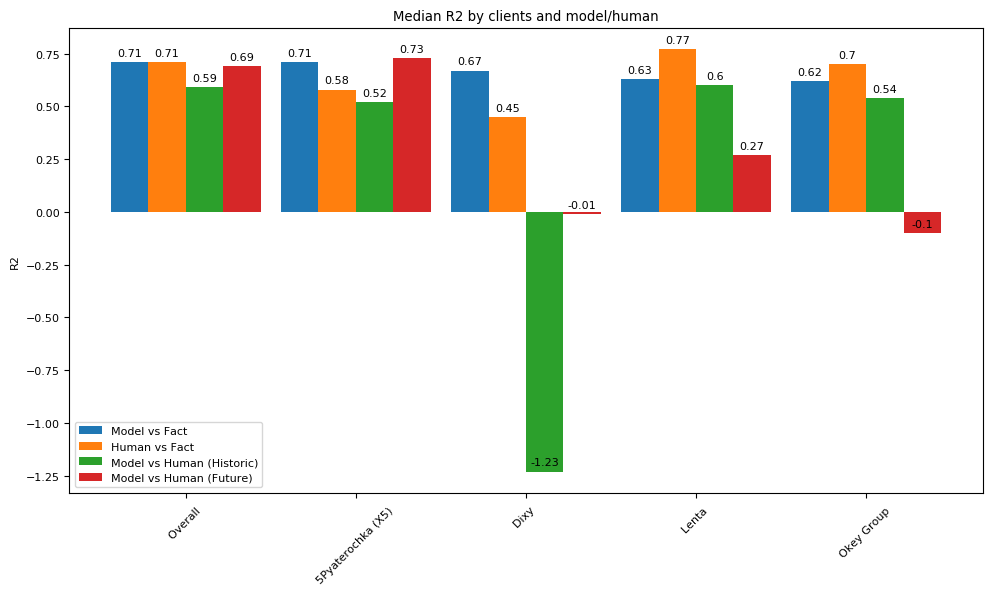

In [7]:
analysis_metrics.plot_metrics(['r2'])

In [8]:
model.update_info(analysis_metrics)

In [9]:
model.save()

The model is saved


# Cluster model

In [10]:
model_cluster = Model(model_name='model_cluster')

params = {
 u'5Pyaterochka (X5)': {'colsample_bytree': 0.55,
  'gamma': 0.8,
  'learning_rate': 0.05,
  'max_depth': 5,
  'min_child_weight': 6.0,
  'n_estimators': 111,
  'reg_alpha': 0.55,
  'reg_lambda': 1.1,
  'subsample': 0.4,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Dixy': {'colsample_bytree': 0.4,
  'gamma': 0.75,
  'learning_rate': 0.1,
  'max_depth': 5,
  'min_child_weight': 7.0,
  'n_estimators': 59,
  'reg_alpha': 0.6000000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.55,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Lenta': {'colsample_bytree': 0.8,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.08,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 137,
  'reg_alpha': 0.7000000000000001,
  'reg_lambda': 1.0,
  'subsample': 0.8,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.5},
 u'Magnit': {'colsample_bytree': 0.4,
  'gamma': 0.9500000000000001,
  'learning_rate': 0.08,
  'max_depth': 4,
  'min_child_weight': 4.0,
  'n_estimators': 152,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.1,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Okey Group': {'colsample_bytree': 0.5,
  'gamma': 1.0,
  'learning_rate': 0.09,
  'max_depth': 4,
  'min_child_weight': 1.0,
  'n_estimators': 98,
  'reg_alpha': 0.8,
  'reg_lambda': 1.1500000000000001,
  'subsample': 0.45,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0}
}

duplication_map = {
    'Okey Group': ['5Pyaterochka (X5)','Dixy', 'Okey Group'],
    'Lenta': ['Lenta'],
    '5Pyaterochka (X5)': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
    'Dixy': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
    'Magnit': ['5Pyaterochka (X5)', 'Lenta', 'Magnit'],
}

model_cluster.create(
    params=params,
    max_evals=None, # params defined
    target_ratio_val=None,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    features=features,
    target='total_units',
#     cat_feature=None,
    cat_feature='account_banner',
#     cat_feature=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group'],
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    account_filter=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'],
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2',
    duplication_map=None)

model_cluster.train()

Future data filtering...
- status of promotion: 153
- products not exist in train dataset: 20564
- excluded flag: 0
- zero planned baseline: 15697
- zero planned in-store total volume: 703
- planned in-store total volume lower then baseline: 875
Model for 5Pyaterochka (X5) trained
Model for Dixy trained
Model for Lenta trained
Model for Magnit trained
Model for Okey Group trained
The model is trained


In [11]:
# To take splitting from the first model
model_cluster.test_splits = model.test_splits

analysis_metrics_cluster = AnalysisMetrics(
    model=model_cluster,
    reevaluate=True,
    number_tests=100,
    use_product_filter=True,
    filter_threshold=300,
    account_test_filter=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group']
)

Data filter initializing...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of 100
Future data filter initializing...
Evaluating the Model for historic data...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100

In [12]:
model_cluster.update_info(analysis_metrics_cluster)
model_cluster.save()

The model is saved


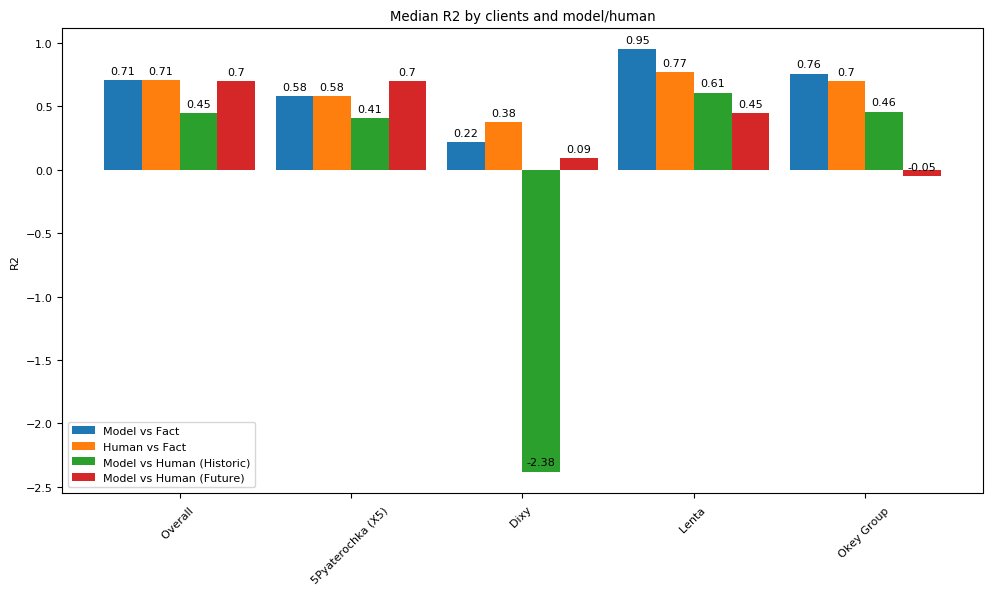

In [13]:
analysis_metrics_cluster.plot_metrics(['r2'])

# Cluster Model with duplication

In [14]:
model_cluster_dup = Model(model_name='model_cluster_dup')

model_cluster_dup.create(
    params=params,
    max_evals=None, # params defined
    target_ratio_val=None,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    features=features,
    target='total_units',
#     cat_feature=None,
    cat_feature='account_banner',
#     cat_feature=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group'],
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    account_filter=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'],
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2',
    duplication_map=duplication_map)

model_cluster_dup.train()

Future data filtering...
- status of promotion: 153
- products not exist in train dataset: 20564
- excluded flag: 0
- zero planned baseline: 15697
- zero planned in-store total volume: 703
- planned in-store total volume lower then baseline: 875
Duplicating the data...
- account = Dixy
- dup = 5Pyaterochka (X5), len = 83
- dup = Lenta, len = 354
- skipped (Dixy == account)
- dup = Okey Group, len = 147


modeling.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['cluster'] = account


- dup = Magnit, len = 82
- account = 5Pyaterochka (X5)
- skipped (5Pyaterochka (X5) == account)
- dup = Lenta, len = 354
- dup = Dixy, len = 139
- dup = Okey Group, len = 147
- dup = Magnit, len = 82
- account = Magnit
- dup = 5Pyaterochka (X5), len = 83
- dup = Lenta, len = 354
- skipped (Magnit == account)
- account = Lenta
- skipped (Lenta == account)
- account = Okey Group
- dup = 5Pyaterochka (X5), len = 83
- dup = Dixy, len = 139
- skipped (Okey Group == account)
- Initial data len: 805
- New data len: 2852 (added: 2047)
Model for 5Pyaterochka (X5) trained
Model for Dixy trained
Model for Lenta trained
Model for Magnit trained
Model for Okey Group trained
The model is trained


In [15]:
# To take splitting from the first model
model_cluster_dup.test_splits = model.test_splits

analysis_metrics_cluster_dup = AnalysisMetrics(
    model=model_cluster_dup,
    reevaluate=True,
    number_tests=100,
    use_product_filter=True,
    filter_threshold=300,
    account_test_filter=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group']
)

Data filter initializing...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of 100
Future data filter initializing...
Evaluating the Model for historic data...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100

In [16]:
model_cluster_dup.update_info(analysis_metrics_cluster_dup)
model_cluster_dup.save()

The model is saved


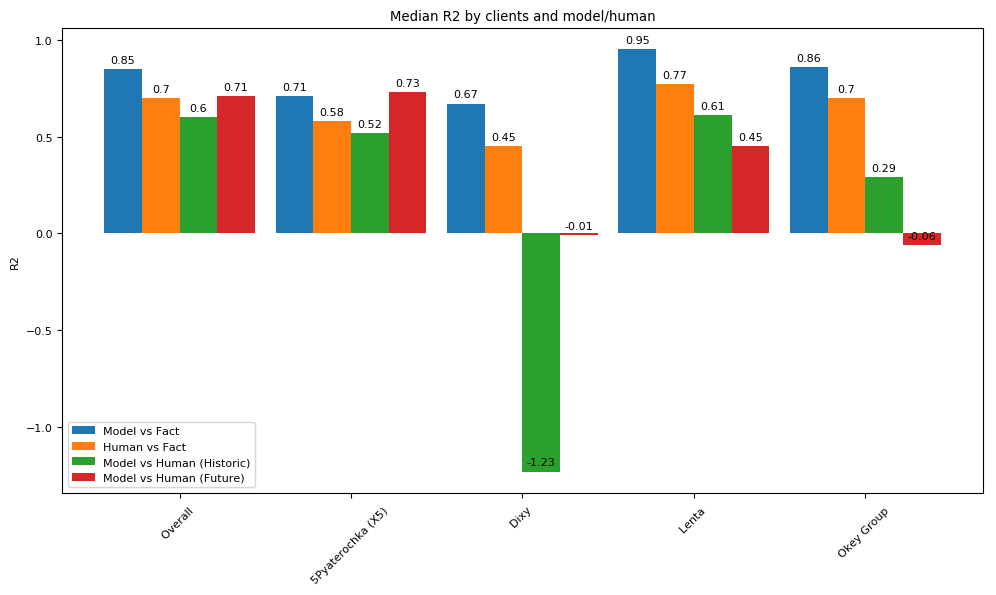

In [17]:
analysis_metrics_cluster_dup.plot_metrics(['r2'])

In [18]:
# model.features
# model.data['cluster'].unique()
# model.get_duplication_info()
# model.params
# model.clusters
# model.cat_feature

In [19]:
# analysis_metrics.get_historic_overall_results()
# analysis_metrics.get_historic_account_results()
# analysis_metrics.get_future_overall_results()
# analysis_metrics.get_future_account_results()